# ParticleBuffer - Unit Cell RDF
The `ParticleBuffer` class is meant to replicate particles beyond a single image while respecting box periodicity. This example demonstrates how we can use this to compute the radial distribution function from a sample crystal's unit cell.

In [1]:
import freud
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from util import box_2d_to_points

Here, we create a box to represent the unit cell and put two points inside. We plot the box and points below.

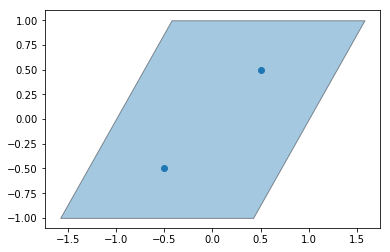

In [2]:
box = freud.box.Box(Lx=2, Ly=2, xy=np.sqrt(1/3), is2D=True)
points = np.asarray([[-0.5, -0.5, -0.5], [0.5, 0.5, 0.5]])
corners = box_2d_to_points(box)
ax = plt.gca()
box_patch = plt.Polygon(corners[:, :2])
patch_collection = matplotlib.collections.PatchCollection([box_patch], edgecolors='black', alpha=0.4)
ax.add_collection(patch_collection)
plt.scatter(points[:, 1], points[:, 2])
plt.show()

Next, we create a `ParticleBuffer` instance and have it compute the "buffer" particles that lie outside the first periodicity. These positions are stored in the `buffer_positions` attribute. The corresponding `buffer_ids` array gives a mapping from the index of the buffer particle to the index of the particle it was replicated from, in the original array of `points`. Finally, the `buffer_box` attribute returns a larger box, expanded from the original box to contain the replicated points.

In [3]:
pbuff = freud.box.ParticleBuffer(box)
pbuff.compute(points, 6, images=True)
print(pbuff.buffer_particles[:10], '...')

[[ 0.6547002  1.5        0.       ]
 [ 1.8094003  3.5        0.       ]
 [ 2.9641018  5.5        0.       ]
 [-3.9641013 -6.5        0.       ]
 [-2.809401  -4.4999995  0.       ]
 [-1.6547002 -2.5000005  0.       ]
 [ 1.5000002 -0.5        0.       ]
 [ 2.6547008  1.5        0.       ]
 [ 3.8094003  3.5        0.       ]
 [ 4.964102   5.5        0.       ]] ...


Below, we plot the original unit cell and the replicated buffer points and buffer box.

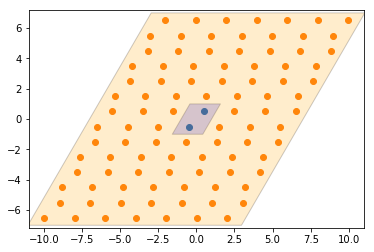

In [4]:
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(pbuff.buffer_particles[:, 0], pbuff.buffer_particles[:, 1])
box_patch = plt.Polygon(corners[:, :2])
buff_corners = box_2d_to_points(pbuff.buffer_box)
buff_box_patch = plt.Polygon(buff_corners[:, :2])
patch_collection = matplotlib.collections.PatchCollection(
    [box_patch, buff_box_patch], facecolors=['blue', 'orange'],
    edgecolors='black', alpha=0.2)
plt.gca().add_collection(patch_collection)
plt.show()

Finally, we can plot the radial distribution function (RDF) of this replicated system, using a value of `rmax` that is larger than the size of the original box. This allows us to see the interaction of the original particles in `ref_points` with their replicated neighbors from the buffer in `points`.

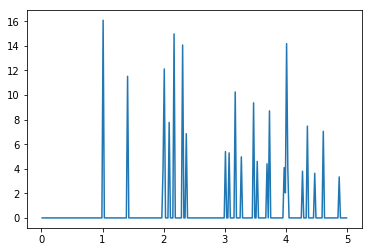

In [5]:
rdf = freud.density.RDF(rmax=5, dr=0.02)
rdf.compute(pbuff.buffer_box, ref_points=points, points=pbuff.buffer_particles)
plt.plot(rdf.R, rdf.RDF)
plt.show()